In [130]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import MultiLabelBinarizer


In [131]:
conn = sqlite3.connect('../db.sqlite3')
cur = conn.cursor()

query = '''
SELECT * 
FROM base_usuario
'''

df = pd.read_sql(query, con = conn)

cur.close()
conn.close()



In [132]:

df = df[['esportes_praticados','fav_esport']]
df.head()

,esportes_praticados,fav_esport
0,"Handebol, Vôlei, Basquete",Handebol
1,"Futebol, Basquete",Basquete
2,Outros,Vôlei
3,"Futsal, Futebol, Basquete, Outros",Futsal
4,"Futsal, Futebol, Vôlei, Basquete",Futebol


In [96]:
praticados[0]
praticados_df = pd.DataFrame()




In [133]:
df['esportes_praticados'] = df['esportes_praticados'].str.replace(' ','').str.split(',')
df

,esportes_praticados,fav_esport
0,"[Handebol, Vôlei, Basquete]",Handebol
1,"[Futebol, Basquete]",Basquete
2,[Outros],Vôlei
3,"[Futsal, Futebol, Basquete, Outros]",Futsal
4,"[Futsal, Futebol, Vôlei, Basquete]",Futebol
...,...,...
197,"[Futsal, Futebol, Handebol, Vôlei, Basquete, O...",Futebol
198,[Futsal],Futsal
199,"[Handebol, Basquete]",Handebol
200,[Outros],Outros


In [134]:
df['esportes_praticados'][0][0]  == df['esportes_praticados'][197][2]

True

In [135]:

mlb = MultiLabelBinarizer(sparse_output=True)

df= df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('esportes_praticados')),
                index=df.index,
                columns=mlb.classes_))

<AxesSubplot:>

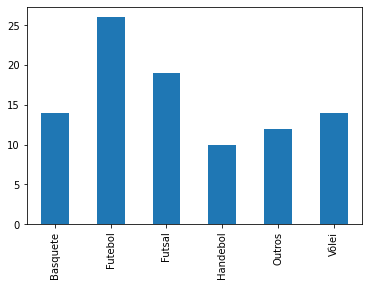

In [157]:
df.loc[df['fav_esport'] == 'Futebol'].sum().drop('fav_esport').plot(kind='bar')

<AxesSubplot:>

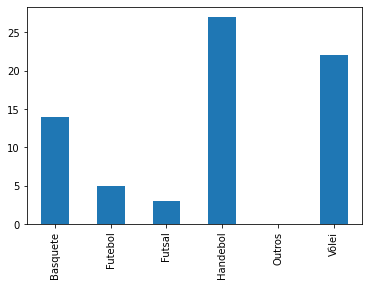

In [158]:
df.loc[df['fav_esport'] == 'Handebol'].sum().drop('fav_esport').plot(kind='bar')

<AxesSubplot:>

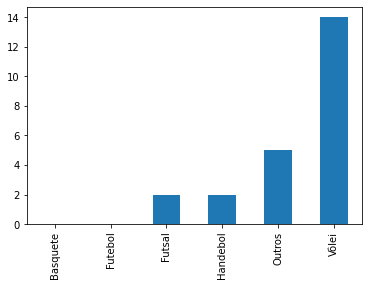

In [159]:
df.loc[df['fav_esport'] == 'Vôlei'].sum().drop('fav_esport').plot(kind='bar')

<AxesSubplot:>

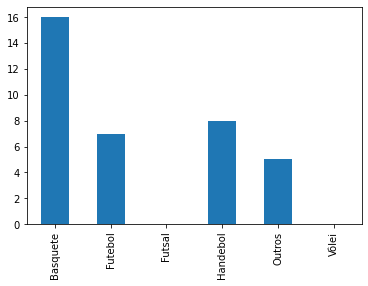

In [160]:
df.loc[df['fav_esport'] == 'Basquete'].sum().drop('fav_esport').plot(kind='bar')

<AxesSubplot:>

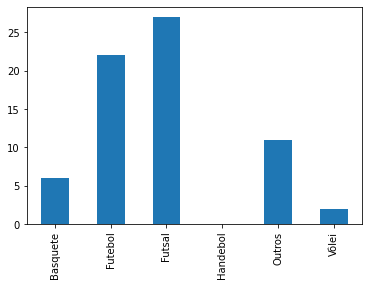

In [161]:
df.loc[df['fav_esport'] == 'Futsal'].sum().drop('fav_esport').plot(kind='bar')

<AxesSubplot:>

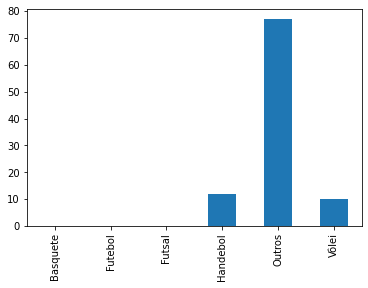

In [162]:
df.loc[df['fav_esport'] == 'Outros'].sum().drop('fav_esport').plot(kind='bar')